# Customer Churn Prediction for a Chain of Gyms

# Introduction

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. One of the most common problems gyms and other services face is customer churn. In order to fight churn, Model Fitness digitized a number of customer profiles. My task is to analyze them and come up with a customer retention strategy.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1.-Import-libraries-and-data" data-toc-modified-id="Step-1.-Import-libraries-and-data-1">Step 1. Import libraries and data</a></span></li><li><span><a href="#Step-2.-Carry-out-exploratory-data-analysis-(EDA)" data-toc-modified-id="Step-2.-Carry-out-exploratory-data-analysis-(EDA)-2">Step 2. Carry out exploratory data analysis (EDA)</a></span></li><li><span><a href="#Step-3.-Build-a-model-to-predict-user-churn" data-toc-modified-id="Step-3.-Build-a-model-to-predict-user-churn-3">Step 3. Build a model to predict user churn</a></span></li><li><span><a href="#Step-4.-Create-user-clusters" data-toc-modified-id="Step-4.-Create-user-clusters-4">Step 4. Create user clusters</a></span></li><li><span><a href="#Step-5.-Come-up-with-conclusions-and-basic-recommendations-on-working-with-customers" data-toc-modified-id="Step-5.-Come-up-with-conclusions-and-basic-recommendations-on-working-with-customers-5">Step 5. Come up with conclusions and basic recommendations on working with customers</a></span></li></ul></div>

## Step 1. Import libraries and data

Importing libraries, and optimizing data importation 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import scikitplot as skplt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv("gym_churn_us.csv", dtype={'gender':'int32', 'Near_Location':'int32','Partner':'int32',\
                                                  'Promo_friends':'int32','Phone':'int32','Churn':'int32',\
                                                  'Group_visits':'int32','Age':'int32','Lifetime':'int32',\
                                                  'Contract_period':'int32',\
                                                  'Avg_additional_charges_total':'float32',\
                                                  'Month_to_end_contract':'int32',\
                                                  'Avg_class_frequency_total':'float32',\
                                                  'Avg_class_frequency_current_month':'float32'})

data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202934,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448486,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669865,12,2,3.205633,3.357214,0
4,1,1,1,1,1,1,0,26,198.362259,1,3,1.113884,1.120078,0


Converting column names to lower case characters.

In [2]:
data.columns = data.columns.str.lower()
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

## Step 2. Carry out exploratory data analysis (EDA)

Viewing general information of data.

In [3]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int32  
 1   near_location                      4000 non-null   int32  
 2   partner                            4000 non-null   int32  
 3   promo_friends                      4000 non-null   int32  
 4   phone                              4000 non-null   int32  
 5   contract_period                    4000 non-null   int32  
 6   group_visits                       4000 non-null   int32  
 7   age                                4000 non-null   int32  
 8   avg_additional_charges_total       4000 non-null   float32
 9   month_to_end_contract              4000 non-null   int32  
 10  lifetime                           4000 non-null   int32  
 11  avg_class_frequency_total          4000 non-null   float

The data has no missing values, all columns are in their required data type.

Viewing description of data.

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943649,96.355606,0.148205,68.868832,136.220161,210.949619,552.590759
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Churn has a mean of about 0.27 and standard deviation of about 0.44. Since, Churn is either 0 or 1, this means on average, about 27% of customers churn. The average age among our customers is about 29 years with a standard deviation of about 3.3. The youngest customer is 18 years old and the elderst  is 41 years old. On average, contracts last for about 5 months. The longest a customer has ever stayed with the gym is 31 months and the shortest is less than a month. On average, the average additional charges is about 146.94 dollars with a standard deviation of about 96.4.

Checking for duplicates

In [5]:
data.duplicated().sum()

0

Theere no dulicates in the  data.

**Look at the mean feature values in two groups: for those who left (churn) and for those who stayed**

churn=0 means users staying, churn=1 leaving

Calculating the proportions of churn 

In [6]:
(round(data["churn"].value_counts()/data.shape[0],2)).to_frame("Churn Proportions")

,Churn Proportions
0,0.73
1,0.27


About 27% of customers churn, and about 73% of customers stay. 

In [7]:
churn_groups =data.groupby("churn").mean()
churn_groups

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445709,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082901,1.662582,0.990575,1.474995,1.044546


Considering `gender`, those who stayed has a mean of about 0.51 and those whose left also has a mean of about 0.51. The mean of churn customers who lived near the gym is about 0.76 and non churn customers is about 0.87. The mean age of churn customers is about 27 years while the mean age of non churn customers is about 30 years. This means, younger people are more likely to leave a gym than older people. The average lifetime of non churn customers is about 5 months and churn customers is less than a month. Customers who stayed had a higher average additional charges in total (about 158.45 dollars) than those who left (about 115.08).  

** Plot bar histograms and feature distributions for those who left (churn) and those who stayed.**

Ploting histograms and feature distributions for those who left and those who stayed. Since the features are a lot, I will automate the plots.

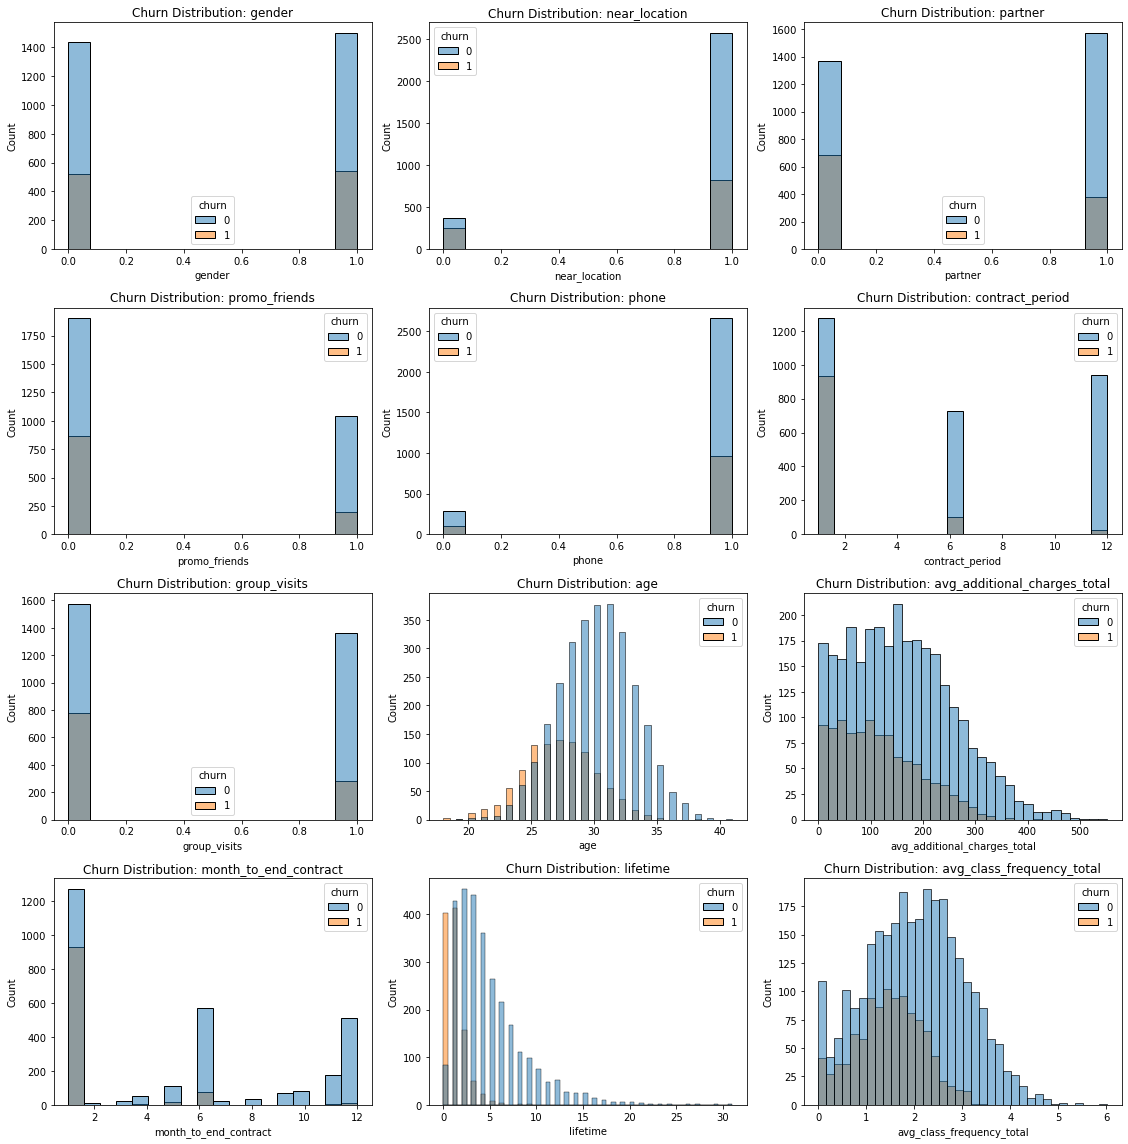

In [8]:
count=1
plt.subplots(figsize=(16, 16))
for i in data.drop("churn",axis=1).columns:
    if count > 12:
        continue
    else:
        plt.subplot(4,3,count)
        plt.title('Churn Distribution: {}'.format(str(i)))
        sns.histplot(data=data, x= i, hue="churn", color ="tab10")
        count+=1
plt.tight_layout()
plt.show()

Considering gender, the proportion of male and female customers are almost the same ( more males than females by a small margin). The proportion of males and females who churn are also almost the same. Customers who live near the gym are five times more than customers who do not. More than half of customers who do not stay closer to the gym churn while less than half of those who live closer to the gym churn. More than half of the customers are employees of a partner company. About 50% of non partner customers churn. Only about 20% of customers from partner companies churn. Customers whose joined the gym without promo friends are more than those who joined via promo friend. However, customers who join gym via promo friends are less likely to churn than those who join without a promo friend. Share of customers who signed 1 month contract are more than those who signed 6 and 12 months contract. No customer signed a three-month contract. More than 70% of customers who sign 1 month contract churn. less than 5% of customers who sign 12 months contract churn. The churn distribution with regards to age is approximately normally distributed. Younger people are more likely to churn than older people. Old customers are less likely to churn than new customers. 

**Build a correlation matrix and display it**

Since the data is mixed with categorial and continuous variables, I will only build pearson correlation with continuous variables and use `Pointbiserial` to find correlation between the features and `churn`(which is a categorial variable).

In [9]:
for i in data.drop("churn",axis=1).columns:
    print("Correlation between {} and Churn: {}".format(i, stats.pointbiserialr(data[i],data["churn"])))

Correlation between gender and Churn: PointbiserialrResult(correlation=0.0007077339851530176, pvalue=0.9643089361847441)
Correlation between near_location and Churn: PointbiserialrResult(correlation=-0.1280979902998106, pvalue=4.201094213764271e-16)
Correlation between partner and Churn: PointbiserialrResult(correlation=-0.15798573698509727, pvalue=9.005856785060883e-24)
Correlation between promo_friends and Churn: PointbiserialrResult(correlation=-0.16223307783351476, pvalue=5.387520276172793e-25)
Correlation between phone and Churn: PointbiserialrResult(correlation=-0.001176601362479831, pvalue=0.9406988149090721)
Correlation between contract_period and Churn: PointbiserialrResult(correlation=-0.3899842115860783, pvalue=1.918120797658854e-145)
Correlation between group_visits and Churn: PointbiserialrResult(correlation=-0.17532465549814882, pvalue=5.611301070205223e-29)
Correlation between age and Churn: PointbiserialrResult(correlation=-0.4047352528235899, pvalue=1.5144442927521406e

Except gender, all the features have a negative and significant correlation with churn.

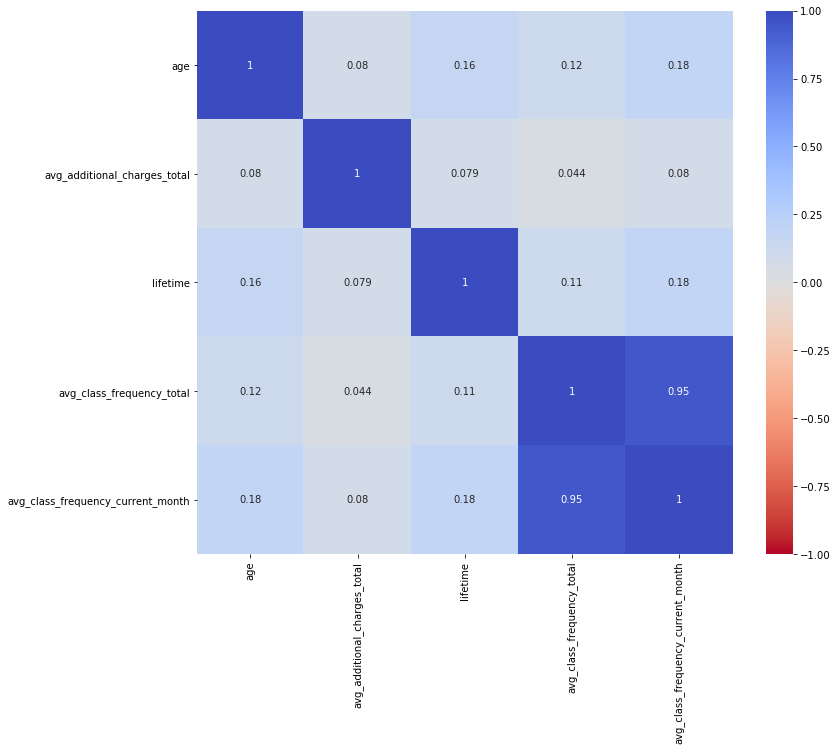

In [10]:
continuous_data = data[['age','avg_additional_charges_total','lifetime','avg_class_frequency_total', \
                        'avg_class_frequency_current_month']]

fig, ax = plt.subplots()
fig.set_size_inches(12,10)
sns.heatmap(continuous_data.corr(), annot= True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r')
plt.show()

`avg_class_frequency_current_month`and `avg_class_frequency_total` has a correlation of about 0.95 which indicates presence of multicollinearity between the two variables. I will therefore drop `avg_class_frequency_current_month`.

In [11]:
data.drop(['avg_class_frequency_current_month'], axis=1, inplace= True)

**Interim Conclusion**

I have ensured the data size have been optimized, and the data is in the required data types. I have checked for missing values and duplicates in the data. EDA analysis has been done specifically to see the distribution of features based on churn. Correlation among the features and target variable (churn) has been done; presence of multicollinearity in the data has been detected and dealt with. The data is ready for prediction and analysis. 

## Step 3. Build a model to predict user churn

**Build a binary classification model for customers where the target feature is the user's leaving next month.**

I will divide the data into train and validation sets using the train_test_split() function. I will split the data into 80% training and 20% validation. I will train the model on the train set with two methods; logistic regression and random forest. Lastly, I will evaluate accuracy, precision, and recall for both models using the validation data. I will use these metrics to compare the models  and choose the model that gave better results.

Spliting the data

In [12]:
X = data.drop("churn",axis=1)
y = data["churn"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20)

scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) 

print(X_train_st[:5])

X_test_st = scaler.transform(X_test)

[[-1.01194635  0.42470725  1.0362828   1.49082457  0.33448954  0.28127754
  -0.82395917  1.46647831  0.69629377  0.39128715  1.65702572 -0.72288944]
 [ 0.98819468  0.42470725 -0.96498755 -0.67076973  0.33448954 -0.81639089
  -0.82395917  0.54861472 -0.87537324 -0.79916624 -0.45394011  1.55581984]
 [-1.01194635 -2.35456308  1.0362828  -0.67076973  0.33448954  0.28127754
   1.21365237  0.54861472 -0.46919378  0.39128715 -0.45394011  2.55611429]
 [ 0.98819468  0.42470725 -0.96498755 -0.67076973  0.33448954  0.28127754
  -0.82395917 -0.98115793  0.09276436  0.39128715 -0.71781084  0.33980058]
 [-1.01194635  0.42470725 -0.96498755 -0.67076973  0.33448954 -0.81639089
   1.21365237 -0.98115793  1.35380946 -0.79916624 -0.19006938  0.52552494]]


Defining the function that will output the metrics, and training the models.

In [13]:
def print_metrics(y_true, y_pred, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))



lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)

print_metrics(y_test, lr_predictions, title='Metrics for Logistic Regression:')
print()
print("Displaying report in classes:")
print(classification_report(y_test, lr_predictions))

print()

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)
print_metrics(y_test, rf_predictions, title='Metrics for RandomForest Classifier:')
print()
print("Displaying report in classes:")
print(classification_report(y_test, rf_predictions))

print()

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)
print_metrics(y_test, gb_predictions, title='Metrics for GradientBoosting Classifier:')
print()
print("Displaying report in classes:")
print(classification_report(y_test, gb_predictions))

Metrics for Logistic Regression:
	Accuracy: 0.91
	Precision: 0.82
	Recall: 0.83

Displaying report in classes:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       597
           1       0.82      0.83      0.82       203

    accuracy                           0.91       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.91      0.91      0.91       800


Metrics for RandomForest Classifier:
	Accuracy: 0.91
	Precision: 0.84
	Recall: 0.78

Displaying report in classes:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       597
           1       0.84      0.78      0.81       203

    accuracy                           0.91       800
   macro avg       0.88      0.86      0.87       800
weighted avg       0.90      0.91      0.90       800


Metrics for GradientBoosting Classifier:
	Accuracy: 0.90
	Precision: 0.82
	Recall: 0.77

Displaying report in classes:

The logistic regression has an accuracy of 91%, a precision of 82%, and a recall of 83%. The randomforest model has an accuracy of 91%, a precision of 84%, and a recall of 78%. The gradientboosting model has an accuracy of 90%, a precision of 82%, and a recall of 77%.The metrics from the models are not very different. However, since we are interested in Churn, the recall score is more important than precision as we are solely interested in true churn cases. Also accuracy in the logistic regression is comparatively higher than in the gradientboosting classifier. I will therefore choose the logistic regression ahead of the other models. A racall of 83% means the model can correctly predict about 5 out of 6 true churn cases which is amazing. Also, about 18% of the churn predictions from our model are not correct (precision of 82%). 

To throw more light on the model performance, I will visualise a confusion matrix for the logistic regression model.

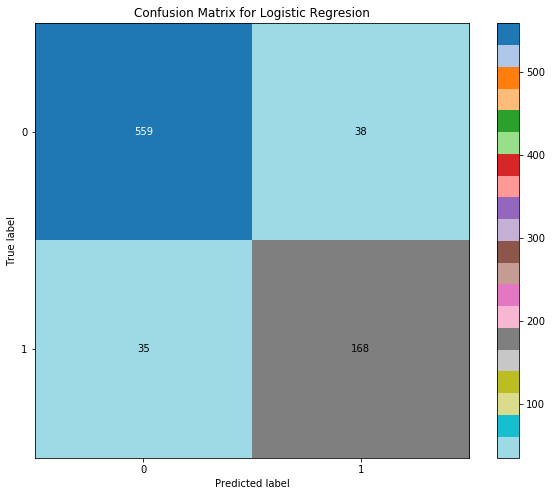

In [14]:
skplt.metrics.plot_confusion_matrix(y_test,lr_predictions,cmap='tab20_r',figsize= (10,8), \
                                    title= "Confusion Matrix for Logistic Regresion")
plt.show()

Out of 597 non churn customers in the validation data, the model correctly predicted 559 of them (True positive), and wrongly predicted 38 of them (False negative or Type II error). Out of the 203 churn customers in the validation data, the model correctly predicted 168 (True negative), and wrongly predicted 35 of them (False positive or Type I error).

**Interim conclusion**

User churn has been predicted. The data was splitted into 80% training and 20% validation set. The logistic regression has an accuracy of 91%, a precision of 82%, and a recall of 83%. The logistic regression performed better.

## Step 4. Create user clusters

**Set aside the column with data on churn and identify object (user) clusters**

I will standardize the features, I will use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. I will use the resulting graph to estimate the number of optimal clusters.

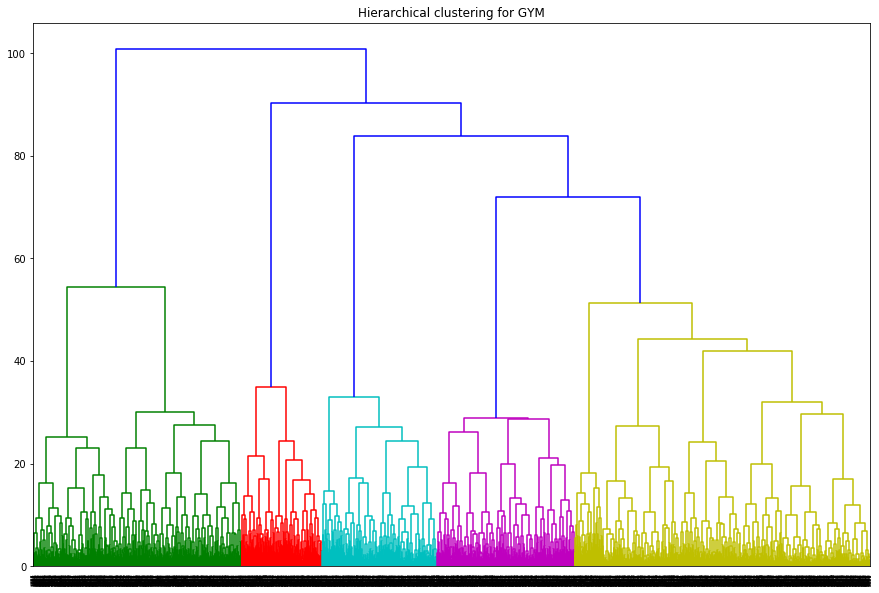

In [15]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

The dendrogram shows there are 5 optimal clusters.

Training the clustering model with the K-means algorithm, and predicting customer clusters

In [16]:
km = KMeans(n_clusters = 5, random_state=42) 
labels = km.fit_predict(x_sc) 

**Look at the mean feature values for clusters. Does anything catch your eye?**

In [17]:
data['cluster_km'] = labels
 
data_grouped = data.groupby('cluster_km').mean().reset_index()
 
data_grouped

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,churn
0,0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208176,4.466321,3.940415,1.854210,0.266839
1,1,0.503831,0.000000,0.467433,0.080460,1.0,2.350575,0.216475,28.595785,136.452332,2.199234,2.909962,1.747056,0.429119
2,2,0.516171,1.000000,0.231565,0.000000,1.0,2.109314,0.375162,28.913325,142.008774,2.004528,3.326649,1.832461,0.357697
3,3,0.500564,0.951522,0.736189,0.467869,1.0,11.709132,0.550169,29.996618,166.036407,10.651635,4.738444,2.057579,0.020293
4,4,0.506829,0.998483,0.773900,1.000000,1.0,3.045524,0.459788,29.125948,142.735321,2.840668,3.813354,1.866970,0.247344


Clusters 2 and 4 have the highest mean in terms of near location. On Average, Cluster 4 had the most partners, and promo friends; Cluster 2 had the least. The average age in all the clusters are almost the same (around 29 years). Customers in cluster 3 has the logest contract (about 12 months) on average and they stay longer than the others, customers in cluster 2 has the least( about 2 months). Customers in cluster 1 do not stay longer (the least).

**Plot distributions of features for the clusters. Do you notice anything?**

I will select the continuous variables and plot their distributions with respect to clusters. I will leave out the features that are categorical. Again, I will automate the graphs.

Distribution of Selected Features:


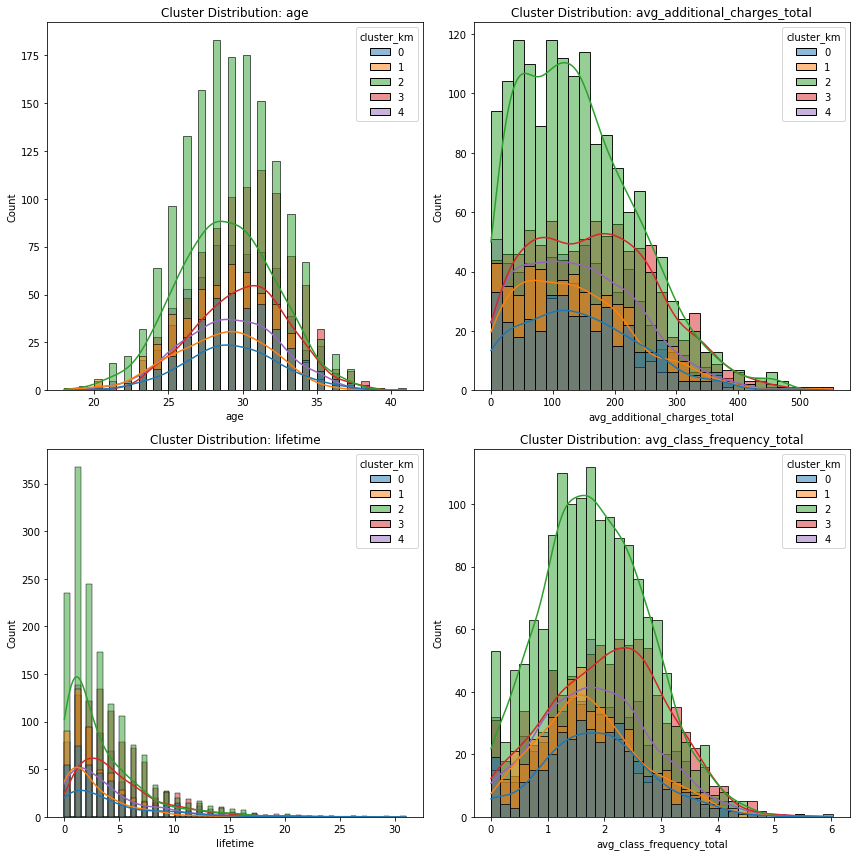

In [18]:
count=1
data_select= data[['age','avg_additional_charges_total', 'lifetime','avg_class_frequency_total', 'churn','cluster_km']]
plt.subplots(figsize=(12, 12))
for i in data_select.drop(["churn", "cluster_km"],axis=1).columns:
    if count > 12:
        continue
    else:
        plt.subplot(2,2,count)
        sns.histplot(data= data_select, x= i, hue="cluster_km", kde=True,  palette="tab10")
        plt.title('Cluster Distribution: {}'.format(str(i)))
        count+=1
print("Distribution of Selected Features:")

plt.tight_layout()
plt.show()


The clusters based on age are approximately normally distributed around age 29 except cluster 3 which has a peak age above 30 years. Average additional charges and lifetime for the clusters are right skewed. Average class frequency total is approximately normally distributed for all clusters.

Calculate the churn rate for each cluster. Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [19]:
cluster_churn = data.query("churn ==1")
(cluster_churn.groupby('cluster_km')["churn"].count()/data.groupby('cluster_km')["churn"].count())\
.reset_index().rename(columns={"cluster_km": "clusters", "churn": "churn rate"})

,clusters,churn rate
0,0,0.266839
1,1,0.429119
2,2,0.357697
3,3,0.020293
4,4,0.247344


Yes the churn rates differ. Clusters 3 and 4 are more prone to leaving, clusters 1 and 2 are more loyal. 

**Making Churn Prediction**

I will predict churn with a cumulative gains curve.

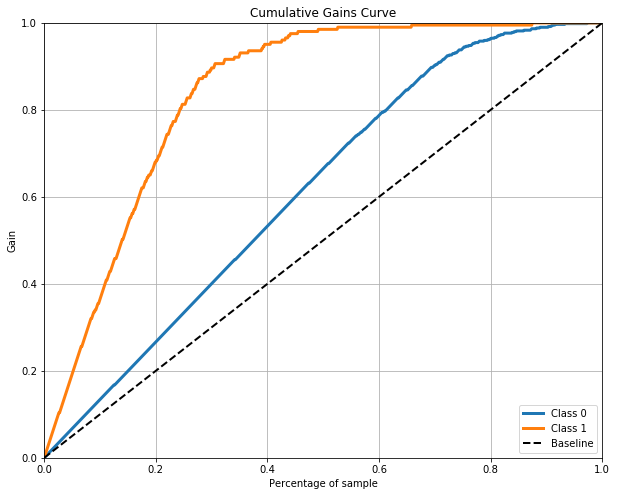

In [20]:
skplt.metrics.plot_cumulative_gain(y_test, lr_probabilities, figsize=(10,8))
plt.show()

Targeting the top 40% of the custmers, we would capture about 95% of clients who would churn.

## Step 5. Come up with conclusions and basic recommendations on working with customers

**Conclusion**

- Customers who live near the gym are 5 times more than customers who live far away. More than 50% of customers who do not stay closer to the gym churn while less than half of those who live closer to the gym churn. 
- More than half of the customers are employees of a partner company. About 50% of non partner customers churn. Only about 20% of customers from partner companies churn. 
- Customers whose joined the gym without promo friends are more than those who joined via promo friend. However, customers who join gym via promo friends are less likely to churn than those who join without a promo friend.
- Share of customers who signed 1 month contract are more than those who signed 6 and 12 months contract. No customer signed a three-month contract. More than 70% of customers who sign 1 month contract churn. less than 5% of customers who sign 12 months contract churn. 
- Younger people are more likely to churn than older people. 
- Old customers are less likely to churn than new customers.
- There are optimally 5 cluster of customers.
- Churn rates differ among clusters. Clusters 3 and 4 are more prone to leaving, clusters 1 and 2 are more loyal.
- Overall, churn rate is about 27%. 
- about 95% of churners are captured in the top 40% of the custmers.

**Recommendations**

- Optimally minimize customer churn with a promotion package targeting the top 40% of customers; this can boost customer retention up to about 95%. 
- Encourage customers to sign 12 months contract to reduce churn rate. 
- Pay much attention to customers in Clusters 3 and 4 as they are more prone to leaving.
- Introduce loyalty programs. 
